In [1]:
# python libraries imports
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import string
import nltk
from pandas import DataFrame
from pandas import Series

In [2]:
# reading the file
dataset = pd.read_csv('twcs.csv')

In [3]:
# observe the dataset to observe how many rows you input a number in the parenthesis
dataset.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [4]:
# same logic as above besides the fact that this goes from bottom-up rather than top-down
dataset.tail()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
2811769,2987947,sprintcare,False,Wed Nov 22 08:43:51 +0000 2017,"@823869 Hey, we'd be happy to look into this f...",NaN,2987948.0
2811770,2987948,823869,True,Wed Nov 22 08:35:16 +0000 2017,@115714 wtf!? I’ve been having really shitty s...,2987947,NaN
2811771,2812240,121673,True,Thu Nov 23 04:13:07 +0000 2017,@143549 @sprintcare You have to go to https://...,NaN,2812239.0
2811772,2987949,AldiUK,False,Wed Nov 22 08:31:24 +0000 2017,"@823870 Sounds delicious, Sarah! 😋 https://t.c...",NaN,2987950.0
2811773,2987950,823870,True,Tue Nov 21 22:01:04 +0000 2017,@AldiUK warm sloe gin mince pies with ice cre...,"2987951,2987949",NaN


In [5]:
# data types of variables
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


In [6]:
# statistical characteristic of each numerical feature
dataset.describe()

,tweet_id,in_response_to_tweet_id
count,2.811774e+06,2.017439e+06
mean,1.504565e+06,1.463141e+06
std,8.616450e+05,8.665730e+05
min,1.000000e+00,1.000000e+00
25%,7.601652e+05,7.155105e+05
50%,1.507772e+06,1.439805e+06
75%,2.253296e+06,2.220646e+06
max,2.987950e+06,2.987950e+06


In [7]:
# top twitter users by tweets
dataset['author_id'].value_counts()

AmazonHelp      169840
AppleSupport    106860
Uber_Support     56270
SpotifyCares     43265
Delta            42253
                 ...  
456282               1
456281               1
456280               1
456276               1
823870               1
Name: author_id, Length: 702777, dtype: int64

In [8]:
print("Number of missing values in each column")
dataset.isnull().sum()

Number of missing values in each column


tweet_id                         0
author_id                        0
inbound                          0
created_at                       0
text                             0
response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64

In [9]:
# shape of dataset
dataset.shape

(2811774, 7)

In [10]:
# inbound and outbound tweets
dataset['inbound'].value_counts()

True     1537843
False    1273931
Name: inbound, dtype: int64

In [11]:
# top authors by response
dataset['in_response_to_tweet_id'].value_counts()

625011.0     844
776192.0     560
37012.0      297
5965.0       185
87814.0      174
            ... 
1058186.0      1
1058185.0      1
1058183.0      1
1058181.0      1
2987950.0      1
Name: in_response_to_tweet_id, Length: 1774822, dtype: int64

In [12]:
# top 10 companies by tweets
top_users = dataset['author_id'].value_counts()
top_users.head(10)

AmazonHelp         169840
AppleSupport       106860
Uber_Support        56270
SpotifyCares        43265
Delta               42253
Tesco               38573
AmericanAir         36764
TMobileHelp         34317
comcastcares        33031
British_Airways     29361
Name: author_id, dtype: int64

In [14]:
# distinguishing authors and dates
author_dates = pd.DataFrame({'author_id': dataset['author_id'], 
                  'created_at':dataset['created_at']})

In [16]:
import matplotlib 
from matplotlib import pyplot as plt

In [19]:
# chart view of top 10 

amzn = author_dates['author_id'].str.contains(pat='AmazonHelp').value_counts(sort=True)[True]
aapl = author_dates['author_id'].str.contains(pat='AppleSupport').value_counts(sort=True)[True]
uber = author_dates['author_id'].str.contains(pat='Uber_Support').value_counts(sort=True)[True]
spot = author_dates['author_id'].str.contains(pat='SpotifyCares').value_counts(sort=True)[True]
dal = author_dates['author_id'].str.contains(pat='Delta').value_counts(sort=True)[True]
tsco = author_dates['author_id'].str.contains(pat='Tesco').value_counts(sort=True)[True]
aal = author_dates['author_id'].str.contains(pat='AmericanAir').value_counts(sort=True)[True]
tmus = author_dates['author_id'].str.contains(pat='TMobileHelp').value_counts(sort=True)[True]
cmcsa = author_dates['author_id'].str.contains(pat='comcastcares').value_counts(sort=True)[True]
bay = author_dates['author_id'].str.contains(pat='British_Airways').value_counts(sort=True)[True]

top_ten = pd.DataFrame([('AmazonHelp', amzn),("AppleSupport", aapl),
('Uber_Support', uber),('SpotifyCares', spot),('Delta', dal),("Tesco", tsco),("AmericanAir", aal),("TMobileHelp", tmus),("comcastcares", cmcsa),("British_Airways", bay)],
columns=('Company', 'Amount Registered'))
top_ten

,Company,Amount Registered
0,AmazonHelp,169840
1,AppleSupport,106860
2,Uber_Support,56270
3,SpotifyCares,43265
4,Delta,42253
5,Tesco,38573
6,AmericanAir,36764
7,TMobileHelp,34317
8,comcastcares,33031
9,British_Airways,29361


In [23]:
# dataframe with tweets associated with days
author_dates['Day of the Week'] = author_dates['created_at'].str[:3]
general_inital_DOW = pd.DataFrame({'Tweets': author_dates['Day of the Week'].value_counts()})
general_inital_DOW

,Tweets
Fri,453028
Wed,445838
Thu,440361
Tue,423052
Mon,387847
Sat,332606
Sun,329042


In [24]:
# reorder days
general_inital_DOW = general_inital_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
general_inital_DOW

,Tweets
Mon,387847
Tue,423052
Wed,445838
Thu,440361
Fri,453028
Sat,332606
Sun,329042


In [25]:
# make variable and not indices
general_final_DOW = general_inital_DOW.reset_index(level=0)
general_final_DOW = general_final_DOW.rename(columns={'index':'Day'})
general_final_DOW

,Day,Tweets
0,Mon,387847
1,Tue,423052
2,Wed,445838
3,Thu,440361
4,Fri,453028
5,Sat,332606
6,Sun,329042


<AxesSubplot:title={'center':'All Users Tweets'}, xlabel='Day'>

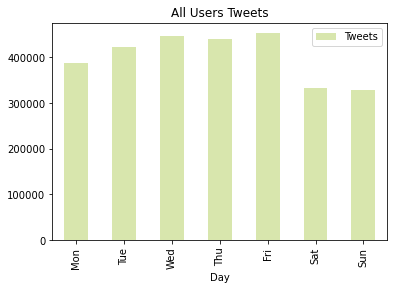

In [26]:
# all users tweets
general_final_DOW.plot.bar(title='All Users Tweets', color='#D8E6AD',x='Day', y='Tweets')

In [27]:
# New dataframe for Amazon
amazon = author_dates[author_dates['author_id'].str.contains(pat='AmazonHelp')]
amazon['Day of the Wk'] = amazon['created_at'].str[:3]
amzn_initial_DOW = pd.DataFrame({'Tweets':amazon['Day of the Week'].value_counts()})
amzn_initial_DOW = amzn_initial_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
amzn_initial_DOW

C:\Users\laith\AppData\Local\Temp\ipykernel_10576\2707724927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['Day of the Wk'] = amazon['created_at'].str[:3]


,Tweets
Mon,21935
Tue,25428
Wed,26858
Thu,26504
Fri,27612
Sat,21822
Sun,19681


In [28]:
amzn_final_DOW = amzn_initial_DOW.reset_index(level=0)
amzn_final_DOW = amzn_final_DOW.rename(columns={'index':'Day'})
amzn_final_DOW

,Day,Tweets
0,Mon,21935
1,Tue,25428
2,Wed,26858
3,Thu,26504
4,Fri,27612
5,Sat,21822
6,Sun,19681


<AxesSubplot:title={'center':'AmazonHelp'}, xlabel='Day'>

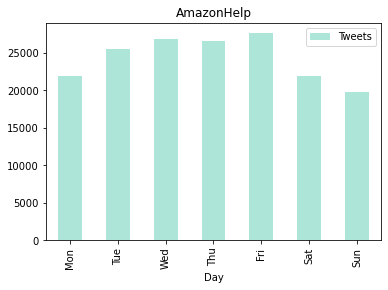

In [34]:
amzn_final_DOW.plot.bar(title='AmazonHelp', color='#ADE6D8',x='Day', y='Tweets')

In [37]:
# New dataframe for AppleSupport
apple = author_dates[author_dates['author_id'].str.contains(pat='AppleSupport')]
apple['Day of the Week'] = apple['created_at'].str[:3]
aapl_initial_DOW = pd.DataFrame({'Tweets':apple['Day of the Week'].value_counts()})
aapl_initial_DOW = aapl_initial_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
aapl_initial_DOW

C:\Users\laith\AppData\Local\Temp\ipykernel_10576\609425690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['Day of the Week'] = apple['created_at'].str[:3]


,Tweets
Mon,15486
Tue,16155
Wed,16831
Thu,15178
Fri,14395
Sat,14068
Sun,14747


In [38]:
aapl_final_DOW = aapl_initial_DOW.reset_index(level=0)
aapl_final_DOW = aapl_final_DOW.rename(columns={'index':'Day'})
aapl_final_DOW

,Day,Tweets
0,Mon,15486
1,Tue,16155
2,Wed,16831
3,Thu,15178
4,Fri,14395
5,Sat,14068
6,Sun,14747


<AxesSubplot:title={'center':'AppleSupport'}, xlabel='Day'>

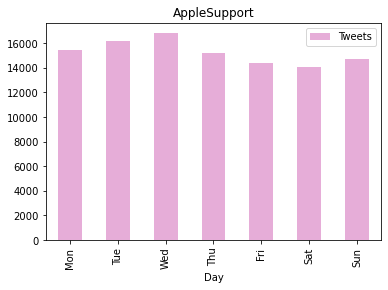

In [39]:
aapl_final_DOW.plot.bar(title='AppleSupport', color='#E6ADD8',x='Day', y='Tweets')

In [40]:
# New dataframe for Uber_Support 
uber = author_dates[author_dates['author_id'].str.contains(pat='Uber_Support')]
uber['Day of the Week'] = uber['created_at'].str[:3]
uber_initial_DOW = pd.DataFrame({'Tweets':uber['Day of the Week'].value_counts()})
uber_initial_DOW = uber_initial_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
uber_initial_DOW

C:\Users\laith\AppData\Local\Temp\ipykernel_10576\669505568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber['Day of the Week'] = uber['created_at'].str[:3]


,Tweets
Mon,7412
Tue,8039
Wed,8068
Thu,8718
Fri,8991
Sat,7350
Sun,7692


In [41]:
uber_final_DOW = uber_initial_DOW.reset_index(level=0)
uber_final_DOW = uber_final_DOW.rename(columns={'index':'Day'})
uber_final_DOW

,Day,Tweets
0,Mon,7412
1,Tue,8039
2,Wed,8068
3,Thu,8718
4,Fri,8991
5,Sat,7350
6,Sun,7692


<AxesSubplot:title={'center':'Uber_Support'}, xlabel='Day'>

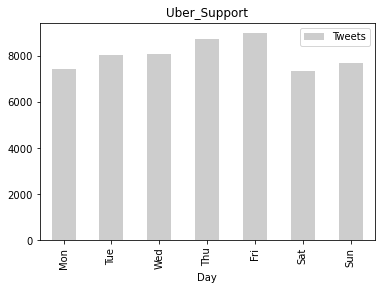

In [42]:
uber_final_DOW.plot.bar(title='Uber_Support', color='#CDCDCD',x='Day', y='Tweets')

In [58]:
# New dataframe for SpotifyCares
spotify = author_dates[author_dates['author_id'].str.contains(pat='SpotifyCares')]
spotify['Day of the Week'] = spotify['created_at'].str[:3]
spot_initial_DOW = pd.DataFrame({'Tweets':spotify['Day of the Week'].value_counts()})
spot_initial_DOW = spot_initial_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
spot_initial_DOW

C:\Users\laith\AppData\Local\Temp\ipykernel_10576\223358429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify['Day of the Week'] = spotify['created_at'].str[:3]


,Tweets
Mon,6234
Tue,6783
Wed,7168
Thu,6897
Fri,7441
Sat,4258
Sun,4484


In [59]:
spot_final_DOW = spot_initial_DOW.reset_index(level=0)
spot_final_DOW = spot_final_DOW.rename(columns={'index':'Day'})
spot_final_DOW

,Day,Tweets
0,Mon,6234
1,Tue,6783
2,Wed,7168
3,Thu,6897
4,Fri,7441
5,Sat,4258
6,Sun,4484


<AxesSubplot:title={'center':'SpotifyCares'}, xlabel='Day'>

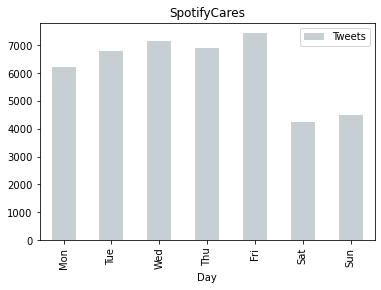

In [60]:
spot_final_DOW.plot.bar(title='SpotifyCares', color='#C7CFD2',x='Day', y='Tweets')

In [54]:
# New dataframe for Delta
delta = author_dates[author_dates['author_id'].str.contains(pat='Delta')]
delta['Day of the Week'] = delta['created_at'].str[:3]
dal_initial_DOW = pd.DataFrame({'Tweets':delta['Day of the Week'].value_counts()})
dal_initial_DOW = dal_initial_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
dal_initial_DOW

C:\Users\laith\AppData\Local\Temp\ipykernel_10576\3116984668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta['Day of the Week'] = delta['created_at'].str[:3]


,Tweets
Mon,6657
Tue,6159
Wed,5953
Thu,6704
Fri,7268
Sat,4515
Sun,4997


In [55]:
dal_final_DOW = dal_initial_DOW.reset_index(level=0)
dal_final_DOW = dal_final_DOW.rename(columns={'index':'Day'})
dal_final_DOW

,Day,Tweets
0,Mon,6657
1,Tue,6159
2,Wed,5953
3,Thu,6704
4,Fri,7268
5,Sat,4515
6,Sun,4997


<AxesSubplot:title={'center':'Delta'}, xlabel='Day'>

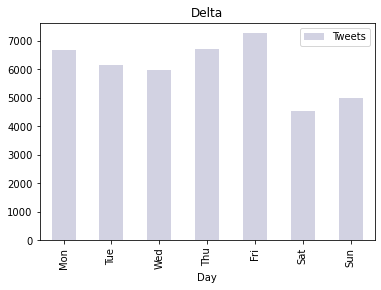

In [56]:
dal_final_DOW.plot.bar(title='Delta', color='#D2D2E2',x='Day', y='Tweets')

In [57]:
# New dataframe for Tesco
tesco = author_dates[author_dates['author_id'].str.contains(pat='Tesco')]
tesco['Day of the Week'] = tesco['created_at'].str[:3]
tsco_initial_DOW = pd.DataFrame({'Tweets':tesco['Day of the Week'].value_counts()})
tsco_initial_DOW = tsco_initial_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
tsco_initial_DOW

C:\Users\laith\AppData\Local\Temp\ipykernel_10576\1366219386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesco['Day of the Week'] = tesco['created_at'].str[:3]


,Tweets
Mon,5811
Tue,5801
Wed,6594
Thu,5910
Fri,5954
Sat,3972
Sun,4531


In [61]:
tsco_final_DOW = tsco_initial_DOW.reset_index(level=0)
tsco_final_DOW = tsco_final_DOW.rename(columns={'index':'Day'})
tsco_final_DOW

,Day,Tweets
0,Mon,5811
1,Tue,5801
2,Wed,6594
3,Thu,5910
4,Fri,5954
5,Sat,3972
6,Sun,4531


<AxesSubplot:title={'center':'Tesco'}, xlabel='Day'>

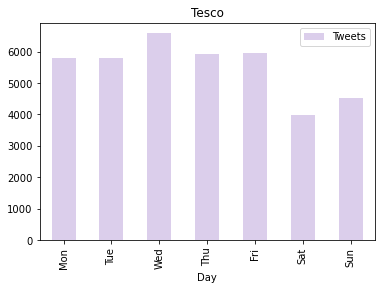

In [62]:
tsco_final_DOW.plot.bar(title='Tesco', color='#DBCEEB',x='Day', y='Tweets')

In [63]:
# New dataframe for AmericanAir
american_air = author_dates[author_dates['author_id'].str.contains(pat='AmericanAir')]
american_air['Day of the Week'] = american_air['created_at'].str[:3]
aal_initial_DOW = pd.DataFrame({'Tweets':american_air['Day of the Week'].value_counts()})
aal_initial_DOW = aal_initial_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
aal_initial_DOW

C:\Users\laith\AppData\Local\Temp\ipykernel_10576\1599842869.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  american_air['Day of the Week'] = american_air['created_at'].str[:3]


,Tweets
Mon,5590
Tue,4978
Wed,5281
Thu,5655
Fri,5793
Sat,4630
Sun,4837


In [64]:
aal_final_DOW = aal_initial_DOW.reset_index(level=0)
aal_final_DOW = aal_final_DOW.rename(columns={'index':'Day'})
aal_final_DOW

,Day,Tweets
0,Mon,5590
1,Tue,4978
2,Wed,5281
3,Thu,5655
4,Fri,5793
5,Sat,4630
6,Sun,4837


<AxesSubplot:title={'center':'AmericanAir'}, xlabel='Day'>

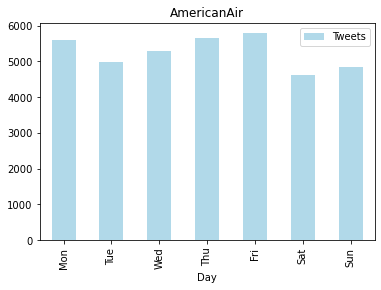

In [65]:
aal_final_DOW.plot.bar(title='AmericanAir', color='#B1D9E9',x='Day', y='Tweets')

In [66]:
# New dataframe for T-Mobile
tmobile = author_dates[author_dates['author_id'].str.contains(pat='TMobileHelp')]
tmobile['Day of the Week'] = tmobile['created_at'].str[:3]
tmus_initial_DOW = pd.DataFrame({'Tweets':tmobile['Day of the Week'].value_counts()})
tmus_initial_DOW = tmus_initial_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
tmus_initial_DOW

C:\Users\laith\AppData\Local\Temp\ipykernel_10576\475699138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmobile['Day of the Week'] = tmobile['created_at'].str[:3]


,Tweets
Mon,3933
Tue,5511
Wed,5416
Thu,5508
Fri,6944
Sat,3769
Sun,3236


In [67]:
tmus_final_DOW = tmus_initial_DOW.reset_index(level=0)
tmus_final_DOW = tmus_final_DOW.rename(columns={'index':'Day'})
tmus_final_DOW

,Day,Tweets
0,Mon,3933
1,Tue,5511
2,Wed,5416
3,Thu,5508
4,Fri,6944
5,Sat,3769
6,Sun,3236


<AxesSubplot:title={'center':'TMobileHelp'}, xlabel='Day'>

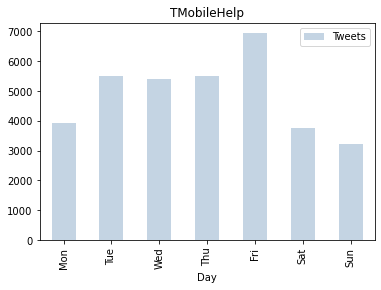

In [68]:
tmus_final_DOW.plot.bar(title='TMobileHelp', color='#C4D4E3',x='Day', y='Tweets')

In [69]:
# New dataframe for comcast
comcast = author_dates[author_dates['author_id'].str.contains(pat='comcastcares')]
comcast['Day of the Week'] = comcast['created_at'].str[:3]
cmcsa_initial_DOW = pd.DataFrame({'Tweets':comcast['Day of the Week'].value_counts()})
cmcsa_initial_DOW = cmcsa_initial_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
cmcsa_initial_DOW

C:\Users\laith\AppData\Local\Temp\ipykernel_10576\1332690084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comcast['Day of the Week'] = comcast['created_at'].str[:3]


,Tweets
Mon,4771
Tue,4920
Wed,5075
Thu,4702
Fri,4685
Sat,4182
Sun,4696


In [70]:
cmcsa_final_DOW = cmcsa_initial_DOW.reset_index(level=0)
cmcsa_final_DOW = cmcsa_final_DOW.rename(columns={'index':'Day'})
cmcsa_final_DOW

,Day,Tweets
0,Mon,4771
1,Tue,4920
2,Wed,5075
3,Thu,4702
4,Fri,4685
5,Sat,4182
6,Sun,4696


<AxesSubplot:title={'center':'comcastcares'}, xlabel='Day'>

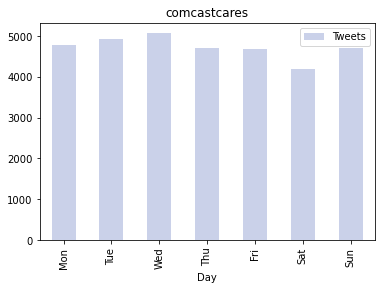

In [71]:
cmcsa_final_DOW.plot.bar(title='comcastcares', color='#CAD1E9',x='Day', y='Tweets')

In [72]:
# New dataframe for british airways
british_airways = author_dates[author_dates['author_id'].str.contains(pat='British_Airways')]
british_airways['Day of the Week'] = british_airways['created_at'].str[:3]
bay_initial_DOW = pd.DataFrame({'Tweets':british_airways['Day of the Week'].value_counts()})
bay_initial_DOW = bay_initial_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
bay_initial_DOW

C:\Users\laith\AppData\Local\Temp\ipykernel_10576\2955090106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  british_airways['Day of the Week'] = british_airways['created_at'].str[:3]


,Tweets
Mon,4097
Tue,4525
Wed,4544
Thu,4778
Fri,4228
Sat,3624
Sun,3565


In [73]:
bay_final_DOW = bay_initial_DOW.reset_index(level=0)
bay_final_DOW = bay_final_DOW.rename(columns={'index':'Day'})
bay_final_DOW

,Day,Tweets
0,Mon,4097
1,Tue,4525
2,Wed,4544
3,Thu,4778
4,Fri,4228
5,Sat,3624
6,Sun,3565


<AxesSubplot:title={'center':'British_Airways'}, xlabel='Day'>

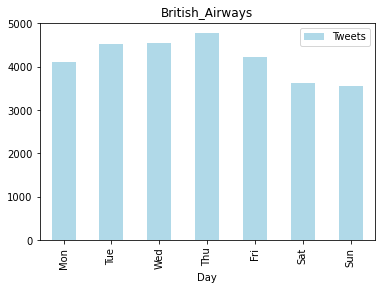

In [74]:
bay_final_DOW.plot.bar(title='British_Airways', color='#B0D9E8',x='Day', y='Tweets')

In [79]:
# Amazon comparison with others
amzn_compare = author_dates[author_dates['author_id'].str.contains(pat='AmazonHelp')]
amzn_compare['Day of the Week'] = amzn_compare['created_at'].str[:3]
amzn_compare_inital = pd.DataFrame({'AmazonHelp':amazon['Day of the Week'].value_counts()})
amzn_compare_inital = amzn_compare_inital.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
amzn_compare_final = amzn_compare_inital.reset_index(level=0)
amzn_compare_final = amzn_compare_final.rename(columns={'index':'Day'})

C:\Users\laith\AppData\Local\Temp\ipykernel_10576\3419322095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_compare['Day of the Week'] = amzn_compare['created_at'].str[:3]


In [80]:
# Apple comparison
aapl_compare = author_dates[author_dates['author_id'].str.contains(pat='AppleSupport')]
aapl_compare['Day of the Week'] = aapl_compare['created_at'].str[:3]
aapl_compare_inital = pd.DataFrame({'AppleSupport':apple['Day of the Week'].value_counts()})
aapl_compare_inital = aapl_compare_inital.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
apple_compare_final = aapl_compare_inital.reset_index(level=0)
apple_compare_final = apple_compare_final.rename(columns={'index':'Day'})

C:\Users\laith\AppData\Local\Temp\ipykernel_10576\1308583979.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_compare['Day of the Week'] = aapl_compare['created_at'].str[:3]


In [81]:
# Uber_Support comparison
uber_compare = author_dates[author_dates['author_id'].str.contains(pat='Uber_Support')]
uber_compare['Day of the Week'] = uber_compare['created_at'].str[:3]
uber_compare_inital = pd.DataFrame({'Uber_Support':uber['Day of the Week'].value_counts()})
uber_compare_inital = uber_compare_inital.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
uber_compare_final = uber_compare_inital.reset_index(level=0)
uber_compare_final = uber_compare_final.rename(columns={'index':'Day'})

C:\Users\laith\AppData\Local\Temp\ipykernel_10576\3375637132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_compare['Day of the Week'] = uber_compare['created_at'].str[:3]


In [82]:
# SpotifyCares comparison
spot_compare = author_dates[author_dates['author_id'].str.contains(pat='SpotifyCares')]
spot_compare['Day of the Week'] = spot_compare['created_at'].str[:3]
spot_compare_inital = pd.DataFrame({'SpotifyCares':spotify['Day of the Week'].value_counts()})
spot_compare_inital = spot_compare_inital.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
spotify_compare_final = spot_compare_inital.reset_index(level=0)
spotify_compare_final = spotify_compare_final.rename(columns={'index':'Day'})

C:\Users\laith\AppData\Local\Temp\ipykernel_10576\560473472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_compare['Day of the Week'] = spot_compare['created_at'].str[:3]


In [83]:
# Delta comparison
dal_compare = author_dates[author_dates['author_id'].str.contains(pat='Delta')]
dal_compare['Day of the Week'] = dal_compare['created_at'].str[:3]
dal_compare_inital = pd.DataFrame({'Delta':delta['Day of the Week'].value_counts()})
dal_compare_inital = dal_compare_inital.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
delta_compare_final = dal_compare_inital.reset_index(level=0)
delta_compare_final = delta_compare_final.rename(columns={'index':'Day'})

C:\Users\laith\AppData\Local\Temp\ipykernel_10576\2306338882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dal_compare['Day of the Week'] = dal_compare['created_at'].str[:3]


In [84]:
# Tesco comparison
tsco_compare = author_dates[author_dates['author_id'].str.contains(pat='Tesco')]
tsco_compare['Day of the Week'] = tsco_compare['created_at'].str[:3]
tsco_compare_inital = pd.DataFrame({'Tesco':tesco['Day of the Week'].value_counts()})
tsco_compare_inital = tsco_compare_inital.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
tesco_compare_final = tsco_compare_inital.reset_index(level=0)
tesco_compare_final = tesco_compare_final.rename(columns={'index':'Day'})

C:\Users\laith\AppData\Local\Temp\ipykernel_10576\1087306876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsco_compare['Day of the Week'] = tsco_compare['created_at'].str[:3]


In [90]:
# American-Air comparison
aal_compare = author_dates[author_dates['author_id'].str.contains(pat='AmericanAir')]
aal_compare['Day of the Week'] = aal_compare['created_at'].str[:3]
aal_compare_inital = pd.DataFrame({'AmericanAir':american_air['Day of the Week'].value_counts()})
aal_compare_inital = aal_compare_inital.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
american_air_compare_final = aal_compare_inital.reset_index(level=0)
american_air_compare_final = american_air_compare_final.rename(columns={'index':'Day'})

C:\Users\laith\AppData\Local\Temp\ipykernel_10576\1751712017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aal_compare['Day of the Week'] = aal_compare['created_at'].str[:3]


In [89]:
# T-Mobile comparison
tmus_compare = author_dates[author_dates['author_id'].str.contains(pat='TMobileHelp')]
tmus_compare['Day of the Week'] = tmus_compare['created_at'].str[:3]
tmus_compare_inital = pd.DataFrame({'TMobileHelp':tmobile['Day of the Week'].value_counts()})
tmus_compare_inital = tmus_compare_inital.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
tmobile_compare_final = tmus_compare_inital.reset_index(level=0)
tmobile_compare_final = tmobile_compare_final.rename(columns={'index':'Day'})

C:\Users\laith\AppData\Local\Temp\ipykernel_10576\1239620654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmus_compare['Day of the Week'] = tmus_compare['created_at'].str[:3]


In [88]:
# comcast comparison
cmcsa_compare = author_dates[author_dates['author_id'].str.contains(pat='comcastcares')]
cmcsa_compare['Day of the Week'] = cmcsa_compare['created_at'].str[:3]
cmcsa_compare_inital = pd.DataFrame({'comcastcares':comcast['Day of the Week'].value_counts()})
cmcsa_compare_inital = cmcsa_compare_inital.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
comcast_compare_final = cmcsa_compare_inital.reset_index(level=0)
comcast_compare_final = comcast_compare_final.rename(columns={'index':'Day'})

C:\Users\laith\AppData\Local\Temp\ipykernel_10576\205211016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmcsa_compare['Day of the Week'] = cmcsa_compare['created_at'].str[:3]


In [91]:
# British_Airways comparison
bay_compare = author_dates[author_dates['author_id'].str.contains(pat='British_Airways')]
bay_compare['Day of the Week'] = bay_compare['created_at'].str[:3]
bay_compare_inital = pd.DataFrame({'British_Airways':british_airways['Day of the Week'].value_counts()})
bay_compare_inital = bay_compare_inital.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
british_airways_compare_final = bay_compare_inital.reset_index(level=0)
british_airways_compare_final = british_airways_compare_final.rename(columns={'index':'Day'})

C:\Users\laith\AppData\Local\Temp\ipykernel_10576\2901009366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bay_compare['Day of the Week'] = bay_compare['created_at'].str[:3]


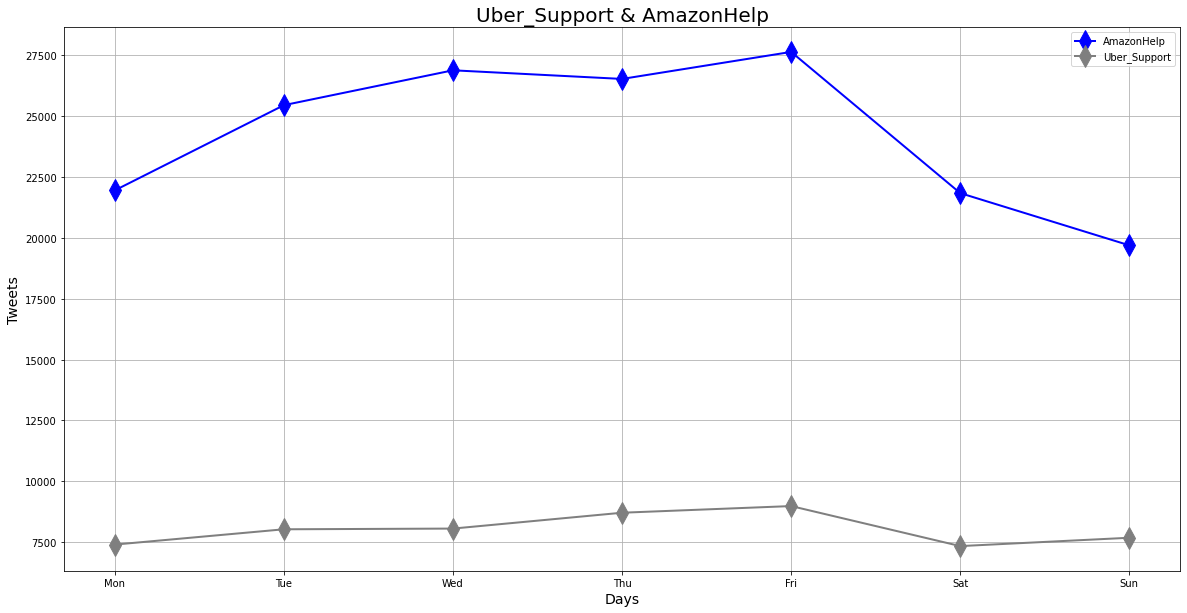

In [93]:
# comparison between uber support and amazonhelp
fig = plt.figure(figsize=(20,10))

plt.plot(amzn_compare_final['Day'], amzn_compare_final['AmazonHelp'], color='blue', marker='d',linewidth=2, markersize=15, label='AmazonHelp')
plt.plot(uber_compare_final['Day'], uber_compare_final['Uber_Support'], color='tab:gray', marker='d',linewidth=2, markersize=15, label='Uber_Support')

plt.title('Uber_Support & AmazonHelp', fontsize=20)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Tweets', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

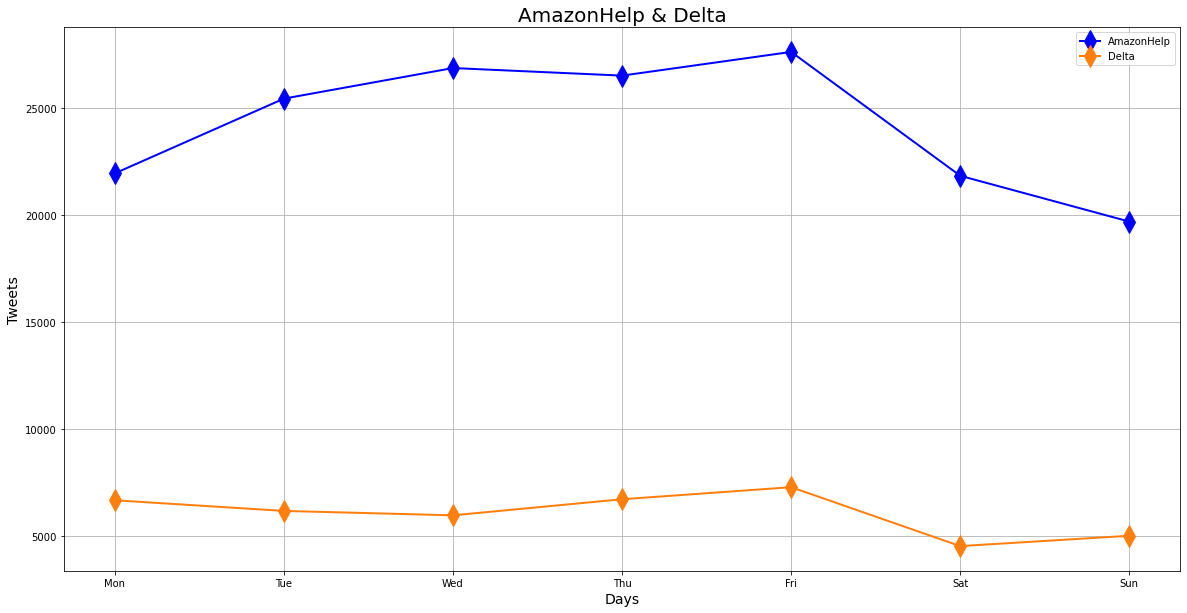

In [99]:
fig = plt.figure(figsize=(20,10))

plt.plot(amzn_compare_final['Day'], amzn_compare_final['AmazonHelp'], color='blue', marker='d',linewidth=2, markersize=15, label='AmazonHelp')
plt.plot(delta_compare_final['Day'], delta_compare_final['Delta'], color='tab:orange', marker='d',linewidth=2, markersize=15, label='Delta')

plt.title('AmazonHelp & Delta', fontsize=20)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Tweets', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

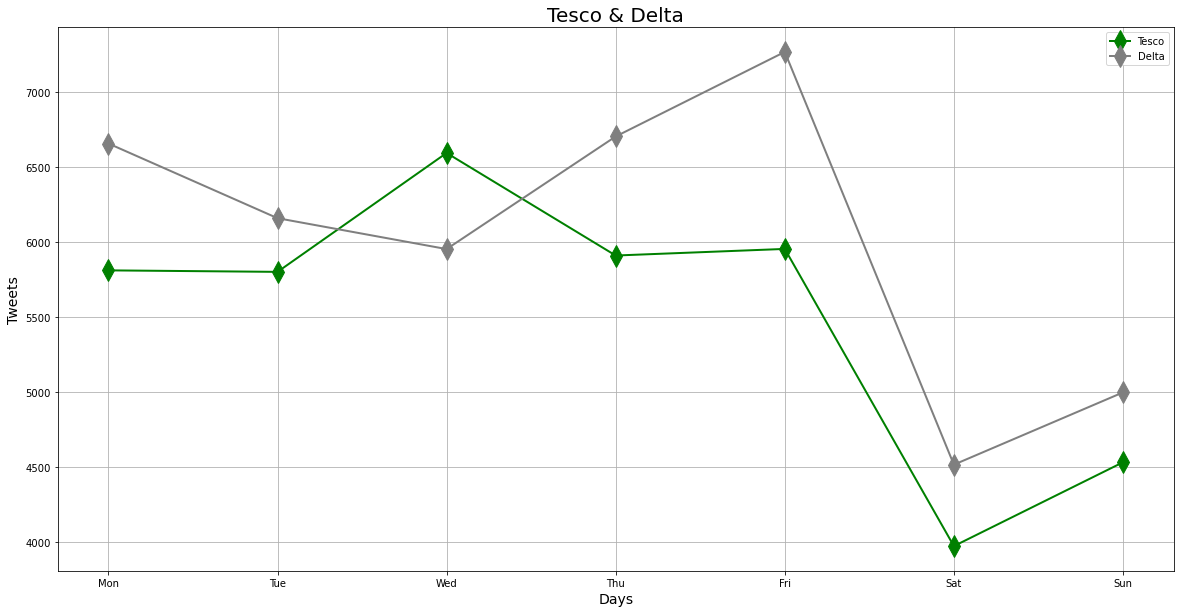

In [100]:
fig = plt.figure(figsize=(20,10))

plt.plot(tesco_compare_final['Day'], tesco_compare_final['Tesco'], color='green', marker='d',linewidth=2, markersize=15, label='Tesco')
plt.plot(delta_compare_final['Day'], delta_compare_final['Delta'], color='tab:gray', marker='d',linewidth=2, markersize=15, label='Delta')

plt.title('Tesco & Delta', fontsize=20)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Tweets', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

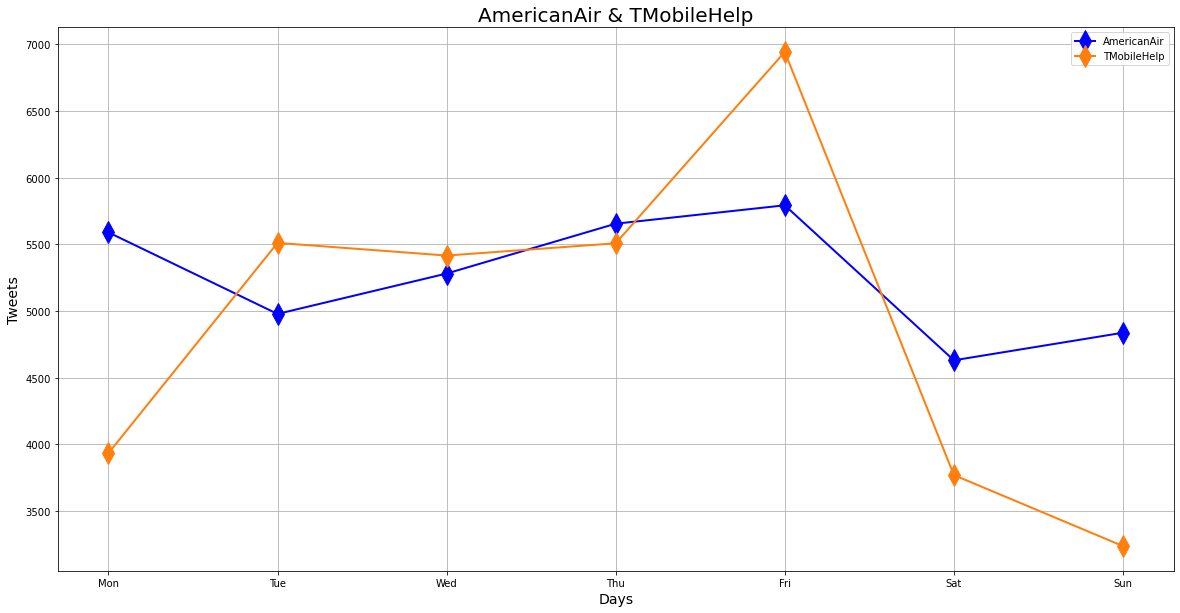

In [101]:
fig = plt.figure(figsize=(20,10))

plt.plot(american_air_compare_final['Day'], american_air_compare_final['AmericanAir'], color='blue', marker='d',linewidth=2, markersize=15, label='AmericanAir')
plt.plot(tmobile_compare_final['Day'], tmobile_compare_final['TMobileHelp'], color='tab:orange', marker='d',linewidth=2, markersize=15, label='TMobileHelp')

plt.title('AmericanAir & TMobileHelp', fontsize=20)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Tweets', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

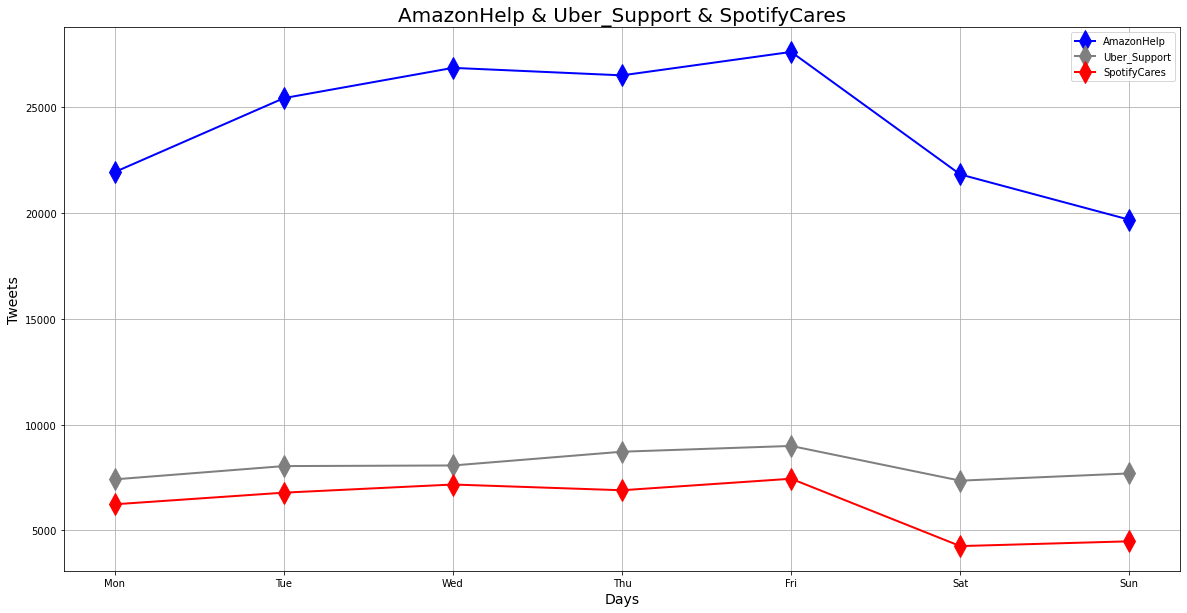

In [102]:
fig = plt.figure(figsize=(20,10))

plt.plot(amzn_compare_final['Day'], amzn_compare_final['AmazonHelp'], color='blue', marker='d',linewidth=2, markersize=15, label='AmazonHelp')
plt.plot(uber_compare_final['Day'], uber_compare_final['Uber_Support'], color='tab:gray', marker='d',linewidth=2, markersize=15, label='Uber_Support')
plt.plot(spotify_compare_final['Day'], spotify_compare_final['SpotifyCares'], color='red', marker='d',linewidth=2,markersize=15, label='SpotifyCares')

plt.title('AmazonHelp & Uber_Support & SpotifyCares', fontsize=20)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Tweets', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

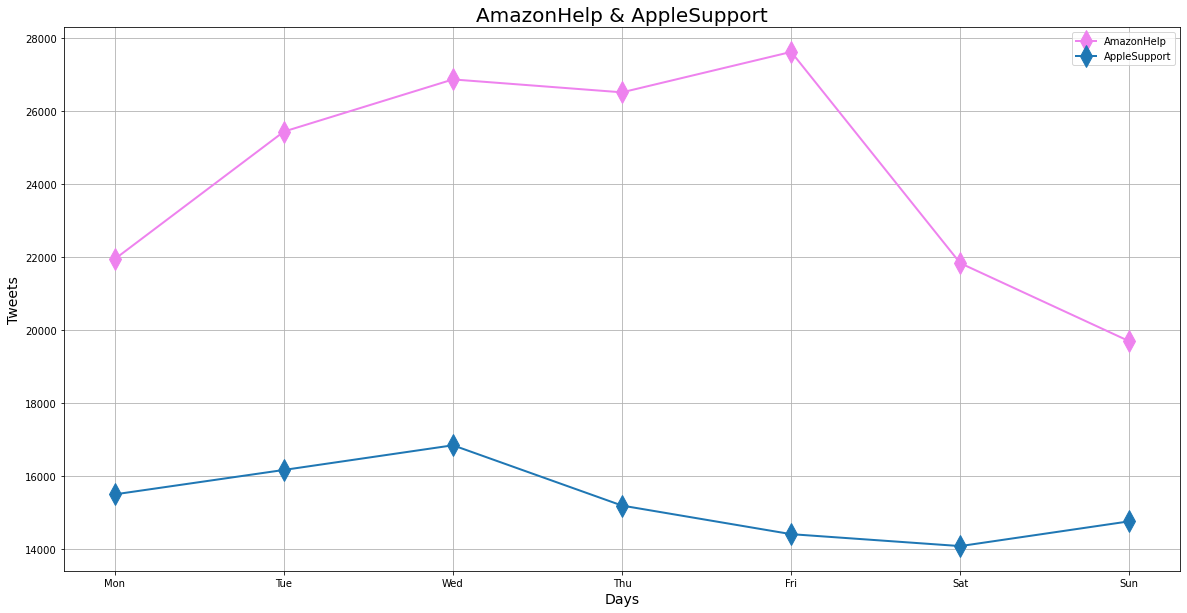

In [106]:
fig = plt.figure(figsize=(20,10))

plt.plot(amzn_compare_final['Day'], amzn_compare_final['AmazonHelp'], color='violet', marker='d',linewidth=2, markersize=15, label='AmazonHelp')
plt.plot(apple_compare_final['Day'], apple_compare_final['AppleSupport'], color='tab:blue', marker='d',linewidth=2, markersize=15, label='AppleSupport')

plt.title('AmazonHelp & AppleSupport', fontsize=20)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Tweets', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

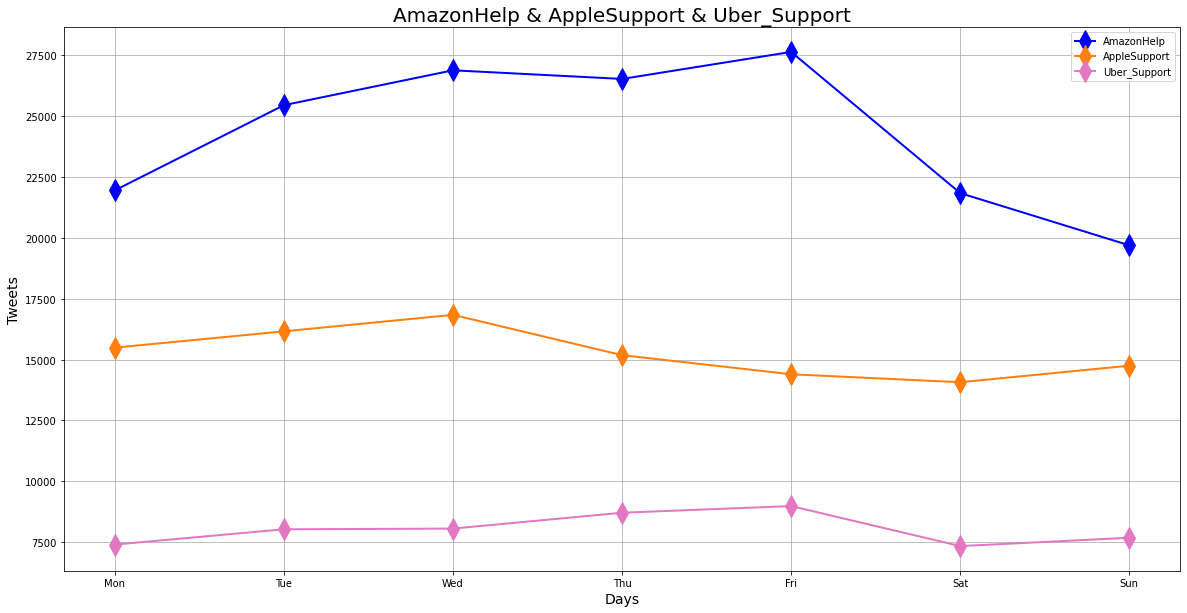

In [105]:
fig = plt.figure(figsize=(20,10))

plt.plot(amzn_compare_final['Day'], amzn_compare_final['AmazonHelp'], color='blue', marker='d',linewidth=2, markersize=15, label='AmazonHelp')
plt.plot(apple_compare_final['Day'], apple_compare_final['AppleSupport'], color='tab:orange', marker='d',linewidth=2, markersize=15, label='AppleSupport')
plt.plot(uber_compare_final['Day'], uber_compare_final['Uber_Support'], color='tab:pink', marker='d',linewidth=2, markersize=15, label='Uber_Support')

plt.title('AmazonHelp & AppleSupport & Uber_Support', fontsize=20)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Tweets', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

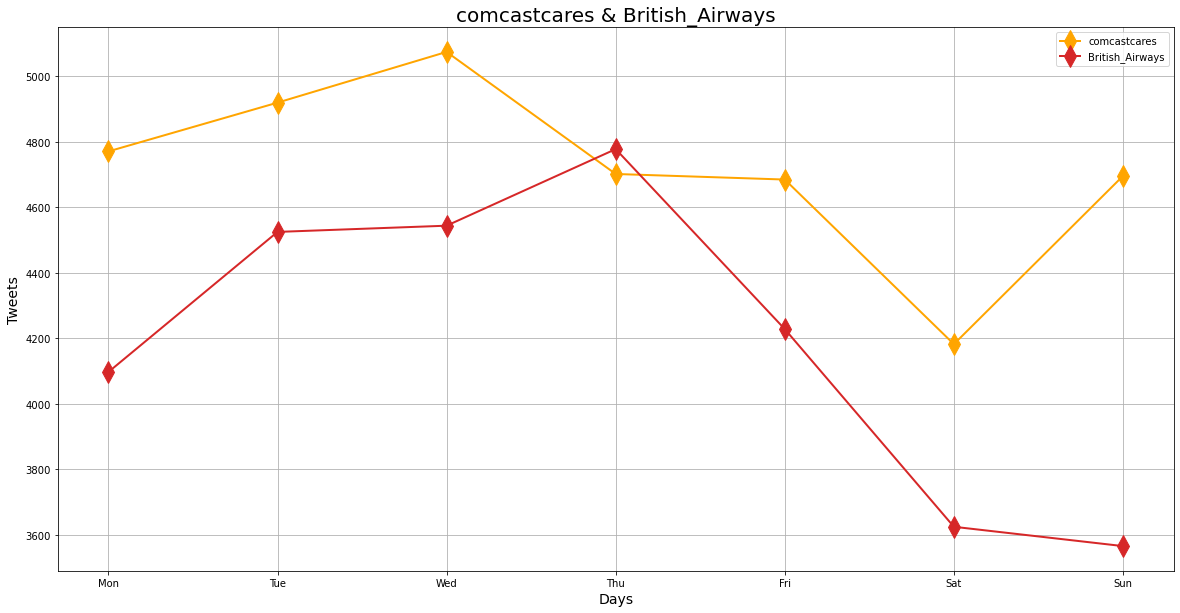

In [109]:
fig = plt.figure(figsize=(20,10))

plt.plot(comcast_compare_final['Day'], comcast_compare_final['comcastcares'], color='orange', marker='d',linewidth=2, markersize=15, label='comcastcares')
plt.plot(british_airways_compare_final['Day'], british_airways_compare_final['British_Airways'], color='tab:red', marker='d',linewidth=2, markersize=15, label='British_Airways')

plt.title('comcastcares & British_Airways', fontsize=20)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Tweets', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()